In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mtcnn.mtcnn import MTCNN
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_recall_curve

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
def extract_frames(video_path, interval_seconds):
    capture = cv2.VideoCapture(video_path)
    frame_rate = capture.get(cv2.CAP_PROP_FPS)
    interval_frames = int(frame_rate * interval_seconds)

    frames = []
    frame_idx = 0
    while True:
        ret, frame = capture.read()
        if not ret:
            break
        if frame_idx % interval_frames == 0:
            frames.append(frame)
        frame_idx += 1

    capture.release()
    return frames

def extract_frames_rand(video_path, num_frames_to_select):
    capture = cv2.VideoCapture(video_path)
    total_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Randomly select frames
    selected_frame_indices = random.sample(range(total_frames), num_frames_to_select)
    selected_frames = []

    for frame_idx in selected_frame_indices:
        capture.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = capture.read()
        if ret:
            selected_frames.append(frame)

    capture.release()
    return selected_frames

def extract_face(frame):
    detector = MTCNN()
    faces = detector.detect_faces(frame)
    if faces:
        x, y, w, h = faces[0]['box']
        face = frame[y:y + h, x:x + w]
        print("Face detected")
        return cv2.resize(face, (224, 224))
    else:
        return None

In [6]:
model = models.load_model('Deepfake2d.h5')

In [7]:
def predict_from_video(video_path,interval=3):
    if not os.path.exists(video_path):
        return "Video Not Found"
    frames = extract_frames_rand(video_path, interval)
    faces = [extract_face(frame) for frame in frames]
    faces = [face for face in faces if face is not None]
    if len(faces) == 0:
        return "No Faces Detected, Try Changing the Interval"
    faces = np.array(faces)
    faces = preprocess_input(faces)
    plt.imshow(cv2.cvtColor(faces[0], cv2.COLOR_BGR2RGB))
    plt.show()
    predictions = model.predict(faces)
    predictions = (predictions > 0.5).astype(int)
    return predictions


1/1 [==============================] - 0s 227ms/step
Face detected
1/1 [==============================] - 0s 220ms/step


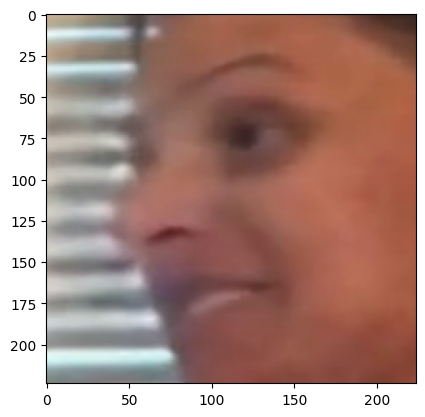

1/1 [==============================] - 2s 2s/step
[[1]]


In [8]:
print(predict_from_video("dataset0/alidfjtwvg.mp4"))

In [9]:
# predict from image
def predict_from_image(image_path,face_detection=True):
    if not os.path.exists(image_path):
        return "Image Not Found"
    frame = cv2.imread(image_path)
    if face_detection:
        face = extract_face(frame)
        if face is None:
            return "No Face Detected"
        face = np.expand_dims(face, axis=0)
        face = preprocess_input(face)
        print(face.shape)
        plt.imshow(cv2.cvtColor(face[0], cv2.COLOR_BGR2RGB))
        plt.show()
        prediction = model.predict(face)
        prediction = (prediction > 0.5).astype(int)
        return prediction
    else:
        frame = cv2.resize(frame, (224, 224))
        frame = preprocess_input(frame)
        frame = np.expand_dims(frame, axis=0)
        print(frame.shape)
        plt.imshow(cv2.cvtColor(frame[0], cv2.COLOR_BGR2RGB))
        plt.show()
        prediction = model.predict(frame)
        # print(prediction)
        prediction = (prediction > 0.5).astype(int)
        return prediction

1/1 [==============================] - 0s 230ms/step
Face detected
(1, 224, 224, 3)


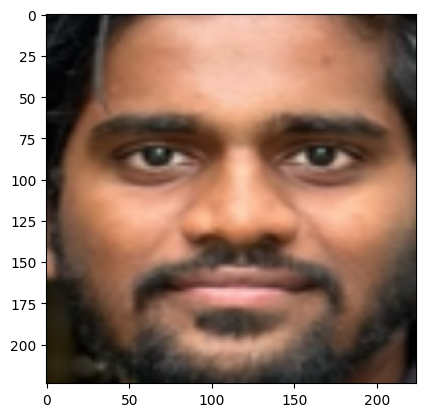

1/1 [==============================] - 0s 81ms/step


array([[0]])

In [10]:
predict_from_image("test/real.png",face_detection=True)

1/1 [==============================] - 0s 227ms/step
Face detected
(1, 224, 224, 3)


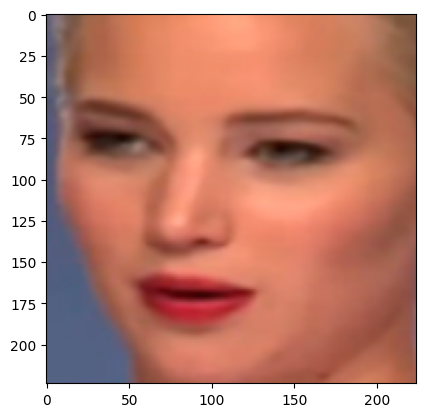

1/1 [==============================] - 0s 83ms/step


array([[0]])

In [11]:
predict_from_image("test/real1.png",face_detection=True)

1/1 [==============================] - 0s 215ms/step
Face detected
(1, 224, 224, 3)


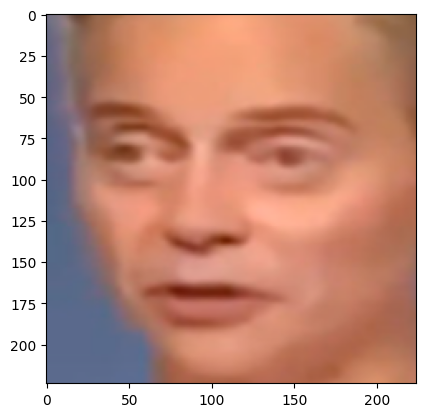

1/1 [==============================] - 0s 79ms/step


array([[1]])

In [12]:
predict_from_image("test/fake1.png",face_detection=True)

1/1 [==============================] - 0s 213ms/step
Face detected
(1, 224, 224, 3)


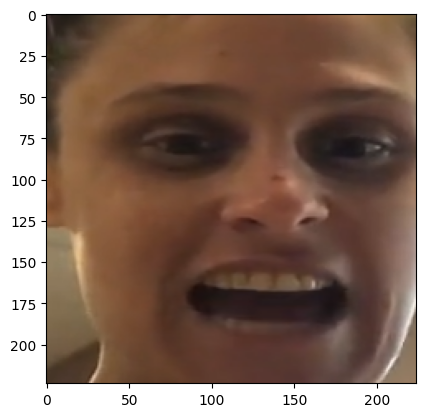

1/1 [==============================] - 0s 75ms/step


array([[0]])

In [13]:
predict_from_image("test/real3.png",face_detection=True)

1/1 [==============================] - 0s 292ms/step
Face detected
(1, 224, 224, 3)


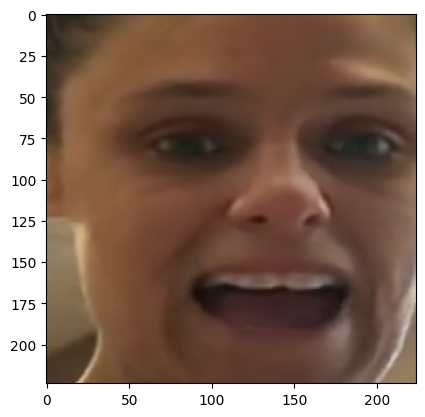

1/1 [==============================] - 0s 72ms/step


array([[1]])

In [14]:
predict_from_image("test/fake3.png",face_detection=True)